<a href="https://colab.research.google.com/github/maitisoumya10/Car-Price-Prediction-Model/blob/main/Car_Price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [9]:
# loading the data from csv file to pandas
car_dataset = pd.read_csv('/cardata.csv')

In [10]:
# first 5 rows of he dataframes
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [12]:
 # information about the dataset
 car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
# missing value
car_dataset.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [14]:
# checking the distribution of categorial data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [15]:
#encoding the "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding the "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)

#encoding the "Transmission	" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)



In [16]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Tranning and Testing

In [17]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training
1. Linear Regression

In [19]:
#loading the lierar regression model
linear_model = LinearRegression()

In [20]:
linear_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [21]:
#prediction on Training data
tranining_data_prediction = linear_model.predict(X_train)

In [22]:
#R square Error
error_score= metrics.r2_score(Y_train, tranining_data_prediction)
print("R square error : ", error_score)

R square error :  0.8799451660493711


Data Visualization

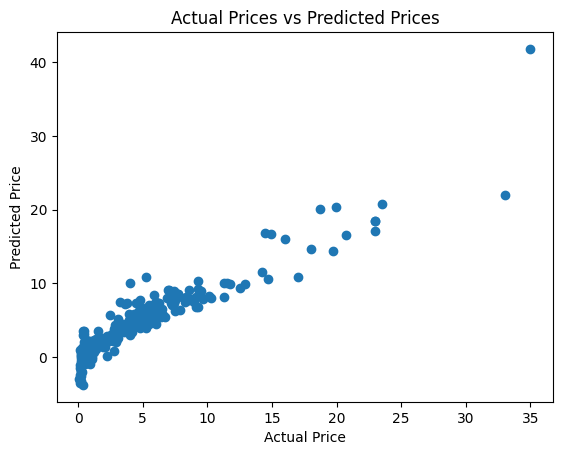

In [23]:
plt.scatter(Y_train, tranining_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [24]:
#prediction on Test data
Test_data_prediction = linear_model.predict(X_test)

In [25]:
#R square Error
error_score= metrics.r2_score(Y_test, Test_data_prediction)
print("R square error : ", error_score)

R square error :  0.8365766715027051


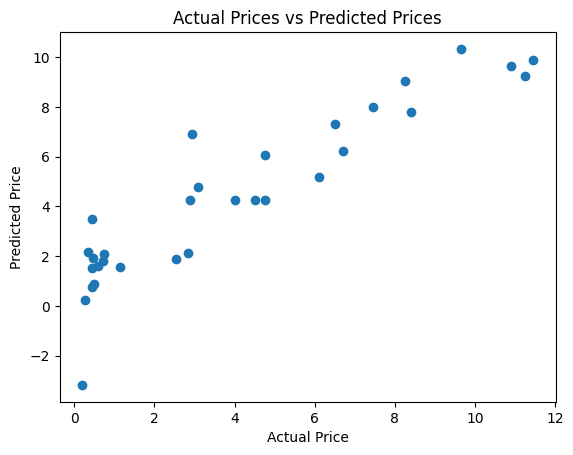

In [26]:
plt.scatter(Y_test, Test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Lasso Regression

In [27]:
#loading the lasso regression model
lass_model = Lasso()

In [28]:
lass_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [29]:
#prediction on Training data
tranining_data_prediction = lass_model.predict(X_train)

In [30]:
#R square Error
error_score= metrics.r2_score(Y_train, tranining_data_prediction)
print("R square error : ", error_score)

R square error :  0.8427856123435794


Data Visualization

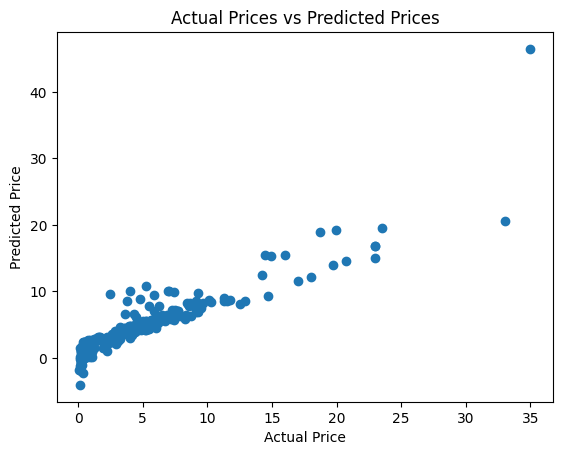

In [31]:
plt.scatter(Y_train, tranining_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [36]:
#prediction on Test data
Test_data_prediction = lass_model.predict(X_test)

In [33]:
#R square Error
error_score= metrics.r2_score(Y_test, Test_data_prediction)
print("R square error : ", error_score)

R square error :  0.8365766715027051


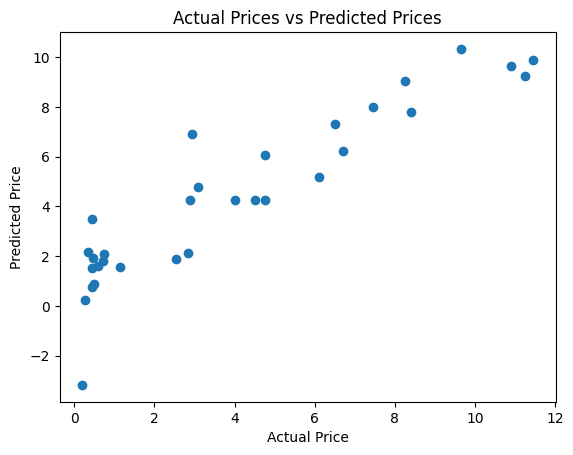

In [34]:
plt.scatter(Y_test, Test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()